<a href="https://colab.research.google.com/github/varunkr24/Neural-Network/blob/Python/NN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow using Colab's tensorflow_version command
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x 
except Exception:   
  pass

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/AIML/Projects/NN Project/NN Project/Part123signal.csv"

In [ ]:
df = pd.read_csv(path)

In [ ]:
# Visualize the dataset
 
# turn on option to display all columns, otherwise some columns may be hidden
pd.set_option('display.max_columns', None)

df.head()

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8                5  
3           9.8                6  
4           9.4                5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.describe().T

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

In [ ]:
df.skew()

Parameter 1        0.982751
Parameter 2        0.671593
Parameter 3        0.318337
Parameter 4        4.540655
Parameter 5        5.680347
Parameter 6        1.250567
Parameter 7        1.515531
Parameter 8        0.071288
Parameter 9        0.193683
Parameter 10       2.428672
Parameter 11       0.860829
Signal_Strength    0.217802
dtype: float64

In [ ]:
import copy
x_train_log = copy.deepcopy(x_train)
to_log = ['Parameter 1', 'Parameter 4', 'Parameter 5','Parameter 6','Parameter 7','Parameter 10','Parameter 11']
x_train_log_trans = x_train_log[to_log].applymap(lambda x: np.log(x+0.000001))

In [ ]:
x_train_log_trans['Parameter 2'] =x_train_log['Parameter 2']
x_train_log_trans['Parameter 3'] = x_train_log['Parameter 3']
x_train_log_trans['Parameter 8'] = x_train_log['Parameter 8']
x_train_log_trans['Parameter 9'] = x_train_log['Parameter 9']

In [ ]:
x_train_log_trans.skew()

Parameter 1     0.411351
Parameter 4     1.719317
Parameter 5     1.650082
Parameter 6    -0.248741
Parameter 7    -0.019970
Parameter 10    0.899839
Parameter 11    0.644559
Parameter 2     0.704533
Parameter 3     0.354937
Parameter 8    -0.005322
Parameter 9     0.199906
dtype: float64

In [ ]:
x_train_log_trans_scaled  = pd.DataFrame(x_train_log_trans).apply(zscore)

In [ ]:
x_test_log = copy.deepcopy(x_test)
to_log = ['Parameter 1', 'Parameter 4', 'Parameter 5','Parameter 6','Parameter 7','Parameter 10','Parameter 11']
x_test_log_trans = x_test_log[to_log].applymap(lambda x: np.log(x+0.000001))

In [ ]:
x_test_log_trans['Parameter 2'] =x_test_log['Parameter 2']
x_test_log_trans['Parameter 3'] = x_test_log['Parameter 3']
x_test_log_trans['Parameter 8'] = x_test_log['Parameter 8']
x_test_log_trans['Parameter 9'] = x_test_log['Parameter 9']

In [ ]:
x_test_log_trans_scaled  = pd.DataFrame(x_test_log_trans).apply(zscore)

In [ ]:
x_test_log_trans_scaled.skew()

Parameter 1     0.339810
Parameter 4     1.981979
Parameter 5     1.993358
Parameter 6    -0.203165
Parameter 7    -0.213855
Parameter 10    0.976413
Parameter 11    0.703258
Parameter 2     0.602844
Parameter 3     0.221167
Parameter 8     0.284793
Parameter 9     0.156117
dtype: float64

In [ ]:
df.isnull().any()

Parameter 1        False
Parameter 2        False
Parameter 3        False
Parameter 4        False
Parameter 5        False
Parameter 6        False
Parameter 7        False
Parameter 8        False
Parameter 9        False
Parameter 10       False
Parameter 11       False
Signal_Strength    False
dtype: bool

In [ ]:
df['Signal_Strength'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
sns.set(font_scale = 10)
sns.pairplot(df, diag_kind='kde', corner=True,palette='brown', height=15);

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Signal_Strength',axis=1)  
Y = df['Signal_Strength']   # Target variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [ ]:
x_train.head()

Parameter 1  Parameter 2  ...  Parameter 10  Parameter 11
126          8.2        1.330  ...          0.49          10.9
810          7.3        0.490  ...          0.47          10.5
635          8.7        0.840  ...          0.55           9.7
598          8.5        0.585  ...          0.48           9.8
880          9.2        0.560  ...          0.49           9.9

[5 rows x 11 columns]

In [ ]:
from scipy.stats import zscore

x_train_scaled  = pd.DataFrame(x_train).apply(zscore)
y_train_scaled  = pd.DataFrame(y_train).apply(zscore)

x_test_scaled  = pd.DataFrame(x_test).apply(zscore)
y_test_scaled  = pd.DataFrame(y_test).apply(zscore)

In [ ]:
# Create model using the TensorFlow Keras library
basic_model = tf.keras.Sequential()
basic_model.add(tf.keras.layers.Dense(units=1, activation='linear', input_shape=(11,),
                                kernel_initializer='random_uniform',
                                bias_initializer='zeros'))


In [ ]:
# Compile model
optimizer = "sgd"
basic_model.compile(loss='mean_squared_error', optimizer=optimizer )

In [ ]:

# Train model using data
initial_epochs = 100
batch_size = 10
train_basic_model = basic_model.fit(x_train_scaled, y_train_scaled, 
                       epochs=initial_epochs, batch_size=batch_size, verbose=1)


Epoch 1/100
112/112 [==============================] - 2s 1ms/step - loss: 0.7488
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6511
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6339
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6328
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6381
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6717
Epoch 7/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6610
Epoch 8/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6674
Epoch 9/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6467
Epoch 10/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6221
Epoch 11/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6342
Epoch 12/100
112/112 [==============================] - 0s 1ms/step - loss: 0.6226
Epoch 13/100


<class 'tensorflow.python.keras.callbacks.History'>


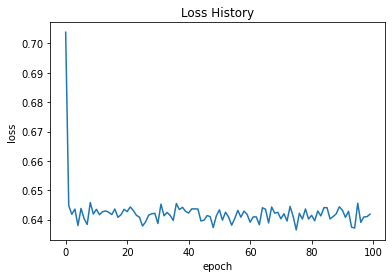

In [ ]:
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()

print(type(train_basic_model))
plot_loss(train_basic_model)

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
Dense_model = tf.keras.Sequential()
Dense_model.add(Dense(11, input_dim=11, kernel_initializer='random_uniform', activation='relu'))
Dense_model.add(Dense(11, kernel_initializer='random_uniform', activation='relu'))
Dense_model.add(Dense(1, kernel_initializer='random_uniform'))

In [ ]:
# Compile model
optimizer = "sgd"
Dense_model.compile(loss='mean_squared_error', optimizer=optimizer )

In [ ]:

# Train model using data
epochs = 200
batch_size = 100
train_model = Dense_model.fit(x_train_scaled, y_train_scaled, 
                       epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.9524
Epoch 2/1000
112/112 [==============================] - 0s 1ms/step - loss: 0.9948
Epoch 3/1000
112/112 [==============================] - 0s 2ms/step - loss: 1.0360
Epoch 4/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.9792
Epoch 5/1000
112/112 [==============================] - 0s 2ms/step - loss: 1.0073
Epoch 6/1000
112/112 [==============================] - 0s 2ms/step - loss: 1.0215
Epoch 7/1000
112/112 [==============================] - 0s 2ms/step - loss: 1.0598
Epoch 8/1000
112/112 [==============================] - 0s 2ms/step - loss: 1.0425
Epoch 9/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.9730
Epoch 10/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.9185
Epoch 11/1000
112/112 [==============================] - 0s 2ms/step - loss: 1.0433
Epoch 12/1000
112/112 [==============================] - 0s 2ms/step - loss: 0.9842
E

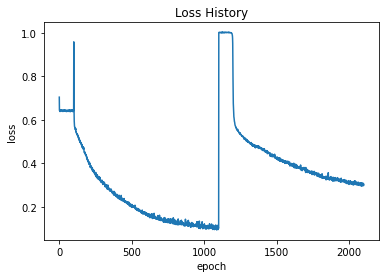

In [ ]:
train_basic_model.history['loss'].extend(train_model.history['loss'])   
plot_loss(train_basic_model)

In [ ]:
# Compile model
optimizer1 = "adam"
Dense_model.compile(loss='mean_squared_error', optimizer=optimizer )


# Train model using data
epochs = 500
batch_size = 10
train_model1 = Dense_model.fit(x_train_scaled, y_train_scaled, 
                       epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/500
112/112 [==============================] - 0s 2ms/step - loss: 0.9604
Epoch 2/500
112/112 [==============================] - 0s 2ms/step - loss: 1.0020
Epoch 3/500
112/112 [==============================] - 0s 2ms/step - loss: 0.8988
Epoch 4/500
112/112 [==============================] - 0s 2ms/step - loss: 1.0326
Epoch 5/500
112/112 [==============================] - 0s 2ms/step - loss: 1.0052
Epoch 6/500
112/112 [==============================] - 0s 2ms/step - loss: 1.0756
Epoch 7/500
112/112 [==============================] - 0s 2ms/step - loss: 1.0152
Epoch 8/500
112/112 [==============================] - 0s 2ms/step - loss: 0.9447
Epoch 9/500
112/112 [==============================] - 0s 2ms/step - loss: 0.9556
Epoch 10/500
112/112 [==============================] - 0s 2ms/step - loss: 0.9557
Epoch 11/500
112/112 [==============================] - 0s 2ms/step - loss: 0.9972
Epoch 12/500
112/112 [==============================] - 0s 2ms/step - loss: 1.0553
Epoch 13/500


In [ ]:
model_predicted =  Dense_model.predict(x_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error
print("prediction mean squared error:", 
          mean_squared_error(y_test_scaled, model_predicted ))

prediction mean squared error: 0.9515096512491941


In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import regularizers, optimizers

In [ ]:
def create_model(lr, Lambda):

    ## hyperparameters
    learning_rate = lr
    hidden_nodes = 11
    output_nodes = 1
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=lr, decay=1e-7, momentum=0.9)
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])
    return model
    
    # Fit the model
    #model_11.fit(x_train_scaled, y_train_scaled, epochs=iterations, batch_size=200, verbose= 1,validation_data=(x_test_scaled, y_test_scaled))

In [ ]:
# create model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10)

In [ ]:
# define the grid search parameters
lr = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
Lambda = [1e-7,1e-6,1e-5,1e-4,1e-3]

param_grid = dict(lr=lr,Lambda=Lambda)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train_scaled, y_train)
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Streaming output truncated to the last 5000 lines.
Epoch 13/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8538 - mse: 0.7568
Epoch 14/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8132 - mse: 0.7190
Epoch 15/100
75/75 [==============================] - 0s 3ms/step - loss: 0.7969 - mse: 0.7055
Epoch 16/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8544 - mse: 0.7657
Epoch 17/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8809 - mse: 0.7948
Epoch 18/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8271 - mse: 0.7436
Epoch 19/100
75/75 [==============================] - 0s 3ms/step - loss: 1.0052 - mse: 0.9241
Epoch 20/100
75/75 [==============================] - 0s 3ms/step - loss: 0.7517 - mse: 0.6731
Epoch 21/100
75/75 [==============================] - 0s 2ms/step - loss: 0.8077 - mse: 0.7314
Epoch 22/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8940 - mse: 0.8200

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.436226 using {'Lambda': 1e-05, 'lr': 0.001}


In [ ]:
## hyperparameters
iterations = 800
learning_rate = 0.001
hidden_nodes = 11
output_nodes = 1
Lambda = 1e-05

model = Sequential()
model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes, kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])
    
# Fit the model
model.fit(x_train_log_trans_scaled, y_train, epochs=iterations, batch_size=500, verbose= 1,validation_data=(x_test_log_trans_scaled, y_test))



Epoch 1/800
3/3 [==============================] - 0s 79ms/step - loss: 32.2855 - mse: 32.2854 - val_loss: 30.0006 - val_mse: 30.0006
Epoch 2/800
3/3 [==============================] - 0s 19ms/step - loss: 30.3158 - mse: 30.3158 - val_loss: 26.6902 - val_mse: 26.6902
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 26.7720 - mse: 26.7720 - val_loss: 22.0420 - val_mse: 22.0419
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 21.9256 - mse: 21.9255 - val_loss: 16.2139 - val_mse: 16.2139
Epoch 5/800
3/3 [==============================] - 0s 15ms/step - loss: 15.8415 - mse: 15.8414 - val_loss: 9.4716 - val_mse: 9.4716
Epoch 6/800
3/3 [==============================] - 0s 17ms/step - loss: 8.7502 - mse: 8.7502 - val_loss: 3.7037 - val_mse: 3.7037
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 3.2391 - mse: 3.2391 - val_loss: 3.0879 - val_mse: 3.0879
Epoch 8/800
3/3 [==============================] - 0s 15ms/step - loss: 

In [ ]:
model.evaluate(x_train_log_trans_scaled,y_train)

35/35 [==============================] - 0s 2ms/step - loss: 0.3262 - mse: 0.3262


[0.3262171745300293, 0.32619035243988037]

In [ ]:
model.evaluate(x_test_log_trans_scaled,y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.4369 - mse: 0.4369


[0.4369261562824249, 0.43689924478530884]

In [ ]:
y_predicted = model.predict(x_test_log_trans_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error
print("prediction mean squared error:", 
          mean_squared_error(y_test, y_predicted ))

prediction mean squared error: 0.43689926253854644


Classification based NN

In [ ]:
import copy
y_train_new = copy.deepcopy(y_train)
y_test_new = copy.deepcopy(y_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train_new)
encoded_Y = encoder.transform(y_train_new)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_test_new)
encoded_Y = encoder.transform(y_test_new)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)

In [ ]:
def create_model(lr, Lambda):

    ## hyperparameters
    learning_rate = lr
    hidden_nodes = 11
    output_nodes = 6
        
    model = Sequential()
    model.add(Dense(hidden_nodes, input_shape=(11,), activation='relu'))
    model.add(Dense(hidden_nodes, activation='relu'))
    model.add(Dense(output_nodes,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))
    
    sgd = optimizers.SGD(lr=lr, decay=1e-7, momentum=0.9)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10)

In [ ]:
# define the grid search parameters
lr = [1e-5,1e-4,1e-3,1e-2,1e-1]
Lambda = [1e-6,1e-5,1e-4,1e-3]

param_grid = dict(lr=lr,Lambda=Lambda)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(x_train_log_trans_scaled, dummy_y_train)
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Streaming output truncated to the last 5000 lines.
Epoch 13/100
75/75 [==============================] - 0s 3ms/step - loss: 1.0112 - accuracy: 0.5628
Epoch 14/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9466 - accuracy: 0.5848
Epoch 15/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9820 - accuracy: 0.5920
Epoch 16/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9585 - accuracy: 0.6061
Epoch 17/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9993 - accuracy: 0.5602
Epoch 18/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9819 - accuracy: 0.5835
Epoch 19/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9135 - accuracy: 0.6153
Epoch 20/100
75/75 [==============================] - 0s 3ms/step - loss: 0.9398 - accuracy: 0.5878
Epoch 21/100
75/75 [==============================] - 0s 3ms/step - loss: 0.8920 - accuracy: 0.6206
Epoch 22/100
75/75 [=============================

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.608579 using {'Lambda': 1e-06, 'lr': 0.001}


In [ ]:
## hyperparameters
iterations = 800
learning_rate = 0.001
hidden_nodes = 11
output_nodes = 6
Lambda = 1e-06

model = Sequential()
model.add(Dense(hidden_nodes,input_dim=11, activation='relu'))
model.add(Dense(hidden_nodes, activation='relu'))
model.add(Dense(output_nodes,activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))

sgd = optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
# Fit the model
model.fit(x_train_log_trans_scaled, dummy_y_train, epochs=iterations, batch_size=100,validation_data=(x_test_log_trans_scaled, dummy_y_test))



Epoch 1/800
12/12 [==============================] - 1s 19ms/step - loss: 2.0371 - accuracy: 0.0858 - val_loss: 1.9844 - val_accuracy: 0.0771
Epoch 2/800
12/12 [==============================] - 0s 7ms/step - loss: 1.9976 - accuracy: 0.1153 - val_loss: 1.9045 - val_accuracy: 0.0979
Epoch 3/800
12/12 [==============================] - 0s 6ms/step - loss: 1.9162 - accuracy: 0.1684 - val_loss: 1.8311 - val_accuracy: 0.1875
Epoch 4/800
12/12 [==============================] - 0s 5ms/step - loss: 1.8393 - accuracy: 0.2132 - val_loss: 1.7695 - val_accuracy: 0.2354
Epoch 5/800
12/12 [==============================] - 0s 5ms/step - loss: 1.7933 - accuracy: 0.2336 - val_loss: 1.7173 - val_accuracy: 0.2833
Epoch 6/800
12/12 [==============================] - 0s 5ms/step - loss: 1.7379 - accuracy: 0.2881 - val_loss: 1.6735 - val_accuracy: 0.3313
Epoch 7/800
12/12 [==============================] - 0s 5ms/step - loss: 1.7008 - accuracy: 0.3500 - val_loss: 1.6345 - val_accuracy: 0.3667
Epoch 8/800


In [ ]:
model.evaluate(x_test_log_trans_scaled,dummy_y_test)

15/15 [==============================] - 0s 2ms/step - loss: 0.9857 - accuracy: 0.5875


[0.9856757521629333, 0.5874999761581421]

In [ ]:
x_train_log_trans_scaled.shape

(1119, 11)

In [ ]:
x_test_log_trans_scaled.shape

(480, 11)

In [ ]:
1119+480

1599